## Support Vector Machine (SVM) Classification

** Jackie Zuker **

This notebook utilizes the large *epicurious* dataset on recipes, ingredients, and ratings. The number of dimensions is reduced via PCA and then SVM is used for classification. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data_path = "/Users/jacquelynzuker/thinkful/files/epi_r.csv"
data = pd.read_csv(data_path)

In [3]:
# Create a smaller dataset for initial development/troubleshooting
smalls = data.sample(400)

# Create a new rating class based on high scores or low scores. 
data["ratingClass"] = data.rating.apply(lambda x: (1 if x >= 4 else 0))
smalls["ratingClass"] = smalls.rating.apply(lambda x: (1 if x >= 4 else 0))


In [4]:
from sklearn.decomposition import PCA
X = data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium', 'ratingClass'], 1)
Y = data['ratingClass']

pca = PCA(n_components=30, whiten=True)
a = pca.fit(X, Y)
variance = pd.DataFrame(pca.explained_variance_ratio_)



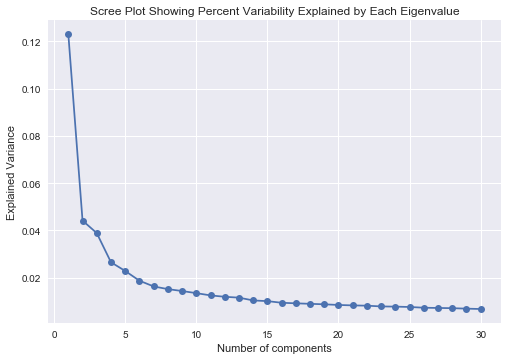

In [5]:
plt.figure(1, figsize=(9, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])

dat = range(1, 31)
plt.plot(dat, variance, marker='o')

plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title("Scree Plot Showing Percent Variability Explained by Each Eigenvalue")

plt.show()

In [6]:
pca = PCA(n_components=30, whiten=True)
X_pca = pca.fit_transform(X)
variance = pd.DataFrame(pca.explained_variance_ratio_)

In [8]:
prediction = svc.predict(X_pca)

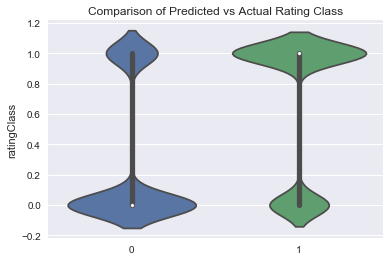

In [21]:
sns.violinplot(prediction, Y)
plt.title("Comparison of Predicted vs Actual Rating Class")
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, prediction)

array([[5542, 3772],
       [2229, 8509]])